##                Project Capstone - India tour analysis
##### Import all the libraries

In [1]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge


In [2]:
!conda install -c conda-forge geocoder --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    future-0.18.2              |           py36_0         713 KB  conda-forge
    click-7.0                  |             py_0          61 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         833 KB

The following NEW packages will be INSTALLED:

    future:   0.18.2-py36_0 conda-

In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 3

In [4]:
pip install xlrd

     |████████████████████████████████| 112kB 11.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
from matplotlib import pyplot as plt 
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import geocoder # import geocoder

print('Libraries imported.')

Libraries imported.


### Data Acquistion

In [6]:
df_India = pd.read_excel('GeoLatnLong_IndiaTour.xlsx')
df_India.head(15)

,Place,Location,State,Category,Latitude,Longitude
0,Alapuzha,South,Kerala,Backwater,9.501300,76.332320
1,Munnar,South,Kerala,Hills,10.081872,77.062940
2,Athirapalli,South,Kerala,Falls,10.285100,76.569700
3,Mahabalipuram,South,TamilNadu,Architecture,12.626927,80.192711
4,Mysore Palace,South,Karnataka,Palace,12.295810,76.639381
5,Tirumala,South,Andha,Temple,13.635510,79.419890
6,Leh & Ladakh,North,Jammu&Kashmir,Mountain,34.144730,77.556120
7,Darjeeling,North,West Bengal,Hill,27.039410,88.263870
8,Rishikesh,North,Dehradun,Bungee jumping,30.086390,78.266580
9,Kasi(Ganges),North,West Bengal,River,25.317645,82.973914


In [7]:
#get the lat and long for India(whole city)
address = 'India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
India_latitude = location.latitude
India_longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(India_latitude, India_longitude))


The geograpical coordinate of India are 22.3511148, 78.6677428.


In [8]:
# create map of India highlighting the interested tour places using latitude and longitude values
map_India = folium.Map(location=(India_latitude, India_longitude), zoom_start=5)

# add markers to map
for lat, lng, place, state in zip(df_India['Latitude'], df_India['Longitude'], df_India['Place'], df_India['State']):
    label = '{}, {}'.format(place, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_India)  
    
map_India

#### Lets explore the surrounding areas of our interested tourist site 

In [9]:
#with foursquare lets explore more!!!!!

#credentials
CLIENT_ID = 'FXAKR2VKXED2PPGI2ZPFMEJD5LAXQ3M4KI01THJWPMWAQHDC' # your Foursquare ID
CLIENT_SECRET = 'EJR3IXSZBX2KX0TAP1FYJBZLLPEXPCWV2WEW5XL4ZPM31JD3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100


In [10]:
#function definition... lets loop through all boroughs and explore the venues surrounding it
def getNearbyVenues(names, loc, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name,loc, lat, lng in zip(names,loc, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            loc,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Location',
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
#Get all the nearby venues by calling the function that we expored using foursquare
df_TourVenues = getNearbyVenues( names=df_India['Place'],
                                   loc = df_India['Location'],
                                   latitudes=df_India['Latitude'],
                                   longitudes=df_India['Longitude']
                                 )


In [12]:
df_TourVenues.groupby(['Neighborhood','Venue Category'])['Venue'].count()
df_TourVenues.head()

,Neighborhood,Location,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alapuzha,South,9.5013,76.33232,Alappuzha,9.491177,76.338213,Scenic Lookout
1,Alapuzha,South,9.5013,76.33232,Alappuzha Light House,9.494063,76.320793,Lighthouse
2,Alapuzha,South,9.5013,76.33232,Lake Palace Resort,9.496098,76.360701,Resort
3,Alapuzha,South,9.5013,76.33232,Cafe Catamaran,9.500791,76.316184,Restaurant
4,Alapuzha,South,9.5013,76.33232,Royal Park,9.498763,76.338664,Indian Restaurant


In [13]:
north = ['Leh & Ladakh','Darjeeling','Rishikesh','Kasi(Ganges)','Taj Mahal']
south = ['Alapuzha','Munnar','Athirapalli','Mahabalipuram','Mysore Palace','Tirumala']
Tour_venues_North = df_TourVenues[df_TourVenues['Neighborhood'].isin(north)]
Tour_venues_South = df_TourVenues[df_TourVenues['Neighborhood'].isin(south)]

In [15]:
#lets analyse the airport/train/bus details for easy commutation
commute = 'Train Station','Airport','Bus Station'

df_Commute = df_TourVenues[df_TourVenues['Venue Category'].isin(commute)].reset_index(drop=True)
df_Commute = df_Commute.rename(columns = {'Neighborhood':'Tour Place','Venue Category':'Commute Type','Venue':'Commute Count'})
df_Commute.head()

,Tour Place,Location,Neighborhood Latitude,Neighborhood Longitude,Commute Count,Venue Latitude,Venue Longitude,Commute Type
0,Alapuzha,South,9.50130,76.332320,Alleppy Railway Station,9.484618,76.322246,Train Station
1,Athirapalli,South,10.28510,76.569700,Railway Station Chalakudy,10.289684,76.541183,Train Station
2,Mysore Palace,South,12.29581,76.639381,Mysore Junction (MYS),12.316718,76.645217,Train Station
3,Tirumala,South,13.63551,79.419890,Tirupati Railway Station,13.628278,79.420286,Train Station
4,Tirumala,South,13.63551,79.419890,RTC Bus Stand,13.630010,79.425853,Bus Station


In [16]:

df_CommuteDetails = df_India[['Place','Location']]
df_Commutenew= pd.get_dummies(df_Commute[['Commute Type']], prefix="", prefix_sep="")


df_CommuteDetails = df_CommuteDetails.merge(df_Commutenew,how = 'left',left_on=df_CommuteDetails['Place'],right_on=df_Commute['Tour Place'])
df_CommuteDetails = df_CommuteDetails.fillna(0)


df_CommuteDetails = df_CommuteDetails.groupby(['Place','Location'],as_index=False).sum()

North = df_CommuteDetails[df_CommuteDetails['Location'] =='North']
South = df_CommuteDetails[df_CommuteDetails['Location'] =='South']
df_CommuteDetails.head(15)

,Place,Location,Airport,Bus Station,Train Station
0,Alapuzha,South,0.0,0.0,1.0
1,Athirapalli,South,0.0,0.0,1.0
2,Darjeeling,North,0.0,0.0,1.0
3,Kasi(Ganges),North,0.0,0.0,1.0
4,Leh & Ladakh,North,1.0,0.0,0.0
5,Mahabalipuram,South,0.0,0.0,0.0
6,Munnar,South,0.0,0.0,0.0
7,Mysore Palace,South,0.0,0.0,1.0
8,Rishikesh,North,0.0,0.0,1.0
9,Taj Mahal,North,1.0,0.0,1.0


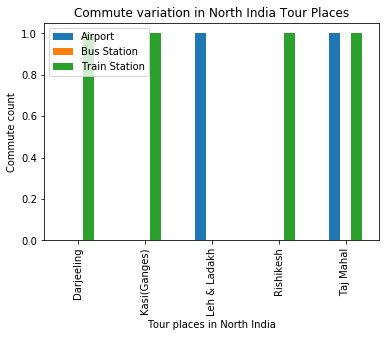

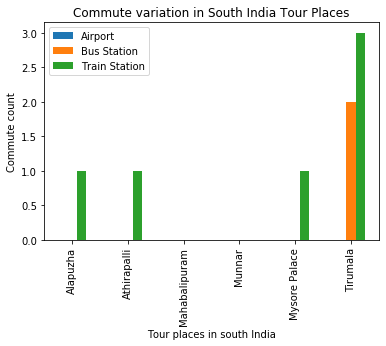

In [17]:
#North Commute
North.plot( kind='bar',x='Place',legend ='Upper right')
plt.xlabel('Tour places in North India') # add to x-label to the plot
plt.ylabel('Commute count') # add y-label to the plot
plt.title('Commute variation in North India Tour Places') # add title to the plot
#plt.yticks([])
plt.show()

#South Commute
South.plot( kind='bar',x='Place')
plt.xlabel('Tour places in south India') # add to x-label to the plot
plt.ylabel('Commute count') # add y-label to the plot
plt.title('Commute variation in South India Tour Places') # add title to the plot
#plt.yticks([])
plt.show()

### Lets analyse the Hotels nearby

In [18]:
df_Hotel = df_TourVenues[['Neighborhood','Location','Venue','Venue Category']][df_TourVenues['Venue Category'].str.contains('Hotel')]
df_HotelCount = df_Hotel.groupby(['Neighborhood','Location','Venue Category'],as_index=False)['Venue'].count()

In [19]:
df_HotelCount[df_HotelCount['Location'] =='South']

,Neighborhood,Location,Venue Category,Venue
0,Alapuzha,South,Hotel,1
3,Mahabalipuram,South,Hotel,1
4,Munnar,South,Hotel,2
5,Mysore Palace,South,Hotel,8
6,Mysore Palace,South,Hotel Bar,1
9,Tirumala,South,Hotel,5


In [20]:
df_HotelCount[df_HotelCount['Location'] =='North']

,Neighborhood,Location,Venue Category,Venue
1,Kasi(Ganges),North,Hotel,12
2,Leh & Ladakh,North,Hotel,2
7,Rishikesh,North,Hotel,5
8,Taj Mahal,North,Hotel,15


### Lets explore the restaurants nearby
##### we will use clustering method to cluster the restaurants by their distance to site locations 

In [21]:
df_Restaurants = df_TourVenues[['Neighborhood','Location','Venue','Venue Category','Venue Latitude','Venue Longitude']][df_TourVenues['Venue Category'].str.contains('Res')]
df_Restaurants.head()

,Neighborhood,Location,Venue,Venue Category,Venue Latitude,Venue Longitude
2,Alapuzha,South,Lake Palace Resort,Resort,9.496098,76.360701
3,Alapuzha,South,Cafe Catamaran,Restaurant,9.500791,76.316184
4,Alapuzha,South,Royal Park,Indian Restaurant,9.498763,76.338664
5,Alapuzha,South,Thaff,Indian Restaurant,9.500463,76.342083
6,Alapuzha,South,Punnamada Lake Resorts,Resort,9.526465,76.356653


In [22]:
df_Restaurants_onehot = pd.get_dummies(df_Restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
df_Restaurants_onehot['Neighborhood'] = df_Restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [df_Restaurants_onehot.columns[-1]] + list(df_Restaurants_onehot.columns[:-1])
df_Restaurants_onehot = df_Restaurants_onehot[fixed_columns].reset_index(drop = True)

df_Restaurants_onehot.head()

,Neighborhood,Andhra Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Himalayan Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,Resort,Rest Area,Restaurant,Seafood Restaurant,South Indian Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,Alapuzha,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Alapuzha,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Alapuzha,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alapuzha,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alapuzha,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:
df_Restaurants_grouped = df_Restaurants_onehot.groupby('Neighborhood').mean().reset_index()
df_Restaurants_grouped.head()

,Neighborhood,Andhra Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant,Gluten-free Restaurant,Himalayan Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,Resort,Rest Area,Restaurant,Seafood Restaurant,South Indian Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,Alapuzha,0.0,0.142857,0.0,0.142857,0.0,0.0,0.357143,0.000000,0.000,0.0,0.0,0.000000,0.285714,0.0,0.071429,0.000000,0.0,0.000000,0.000000,0.0
1,Darjeeling,0.0,0.000000,0.0,0.000000,0.0,0.0,0.333333,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.333333,0.333333,0.0
2,Kasi(Ganges),0.0,0.125000,0.0,0.125000,0.0,0.0,0.625000,0.000000,0.125,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,Leh & Ladakh,0.0,0.000000,0.0,0.000000,0.0,0.5,0.000000,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.500000,0.0
4,Mahabalipuram,0.0,0.000000,0.0,0.000000,0.0,0.0,0.230769,0.076923,0.000,0.0,0.0,0.076923,0.307692,0.0,0.076923,0.230769,0.0,0.000000,0.000000,0.0


In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 3
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df_Restaurants_grouped['Neighborhood']

for ind in np.arange(df_Restaurants_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_Restaurants_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,Alapuzha,Indian Restaurant,Resort,Asian Restaurant
1,Darjeeling,Thai Restaurant,Indian Restaurant,Tibetan Restaurant
2,Kasi(Ganges),Indian Restaurant,Asian Restaurant,Fast Food Restaurant
3,Leh & Ladakh,Tibetan Restaurant,Himalayan Restaurant,Vegetarian / Vegan Restaurant
4,Mahabalipuram,Resort,Seafood Restaurant,Indian Restaurant
5,Munnar,Resort,Middle Eastern Restaurant,Asian Restaurant
6,Mysore Palace,Indian Restaurant,Asian Restaurant,Chinese Restaurant
7,Rishikesh,Indian Restaurant,Restaurant,Gluten-free Restaurant
8,Taj Mahal,Indian Restaurant,Fast Food Restaurant,Resort
9,Tirumala,Indian Restaurant,Restaurant,Rest Area


##### Lets cluster the Neighborhood

In [26]:
df_Rest_Venue = pd.get_dummies(df_Restaurants[['Neighborhood']], prefix="", prefix_sep="")

# add restaurants name column back to dataframe
df_Rest_Venue['Venue Category'] = df_Restaurants['Venue Category'] 
df_Rest_Venue['Venue Latitude'] = df_Restaurants['Venue Latitude'] 
df_Rest_Venue['Venue Longitude'] = df_Restaurants['Venue Longitude'] 
df_Rest_Venue['Location'] = df_Restaurants['Location'] 

# move Venue column to the first column
fixed_columns_Venue = [df_Rest_Venue.columns[-1]] + list(df_Rest_Venue.columns[:-1])
df_Rest_Venue.head()

['Location', 'Alapuzha', 'Darjeeling', 'Kasi(Ganges)', 'Leh & Ladakh', 'Mahabalipuram', 'Munnar', 'Mysore Palace', 'Rishikesh', 'Taj Mahal', 'Tirumala', 'Venue Category', 'Venue Latitude', 'Venue Longitude']


,Alapuzha,Darjeeling,Kasi(Ganges),Leh & Ladakh,Mahabalipuram,Munnar,Mysore Palace,Rishikesh,Taj Mahal,Tirumala,Venue Category,Venue Latitude,Venue Longitude,Location
2,1,0,0,0,0,0,0,0,0,0,Resort,9.496098,76.360701,South
3,1,0,0,0,0,0,0,0,0,0,Restaurant,9.500791,76.316184,South
4,1,0,0,0,0,0,0,0,0,0,Indian Restaurant,9.498763,76.338664,South
5,1,0,0,0,0,0,0,0,0,0,Indian Restaurant,9.500463,76.342083,South
6,1,0,0,0,0,0,0,0,0,0,Resort,9.526465,76.356653,South


In [27]:
# set number of clusters
kclusters = 5

df_Rest_Venue_clustering = df_Rest_Venue.drop(['Venue Category','Venue Latitude','Venue Longitude','Location'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_Rest_Venue_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [28]:
# add clustering labels
df_Rest_Venue.insert(0, 'Cluster Labels', kmeans.labels_)
df_Rest_Venue['Venue'] = df_Restaurants['Venue'] 

In [29]:
df_Rest_Venue.head()
df_Restaurants_Cluster_South = df_Rest_Venue[df_Rest_Venue['Location'] =='South']
df_Restaurants_Cluster_North = df_Rest_Venue[df_Rest_Venue['Location'] =='North']


In [30]:
df_Restaurants_Cluster_South.loc[df_Restaurants_Cluster_South['Cluster Labels'] == 0, df_Restaurants_Cluster_South.columns[[1] + list(range(5, df_Restaurants_Cluster_South.shape[1]))]]

,Alapuzha,Mahabalipuram,Munnar,Mysore Palace,Rishikesh,Taj Mahal,Tirumala,Venue Category,Venue Latitude,Venue Longitude,Location,Venue
2,1,0,0,0,0,0,0,Resort,9.496098,76.360701,South,Lake Palace Resort
3,1,0,0,0,0,0,0,Restaurant,9.500791,76.316184,South,Cafe Catamaran
4,1,0,0,0,0,0,0,Indian Restaurant,9.498763,76.338664,South,Royal Park
5,1,0,0,0,0,0,0,Indian Restaurant,9.500463,76.342083,South,Thaff
6,1,0,0,0,0,0,0,Resort,9.526465,76.356653,South,Punnamada Lake Resorts
7,1,0,0,0,0,0,0,Asian Restaurant,9.511910,76.328652,South,Prince Hotel Alleppey
8,1,0,0,0,0,0,0,Indian Restaurant,9.491777,76.337675,South,Brothers hotel
10,1,0,0,0,0,0,0,Asian Restaurant,9.496437,76.342384,South,Kream Corner
11,1,0,0,0,0,0,0,Fast Food Restaurant,9.469633,76.338405,South,KFC
13,1,0,0,0,0,0,0,Indian Restaurant,9.494660,76.331321,South,Halais Restaurant


In [31]:
df_Restaurants_Cluster_North.head()

,Cluster Labels,Alapuzha,Darjeeling,Kasi(Ganges),Leh & Ladakh,Mahabalipuram,Munnar,Mysore Palace,Rishikesh,Taj Mahal,Tirumala,Venue Category,Venue Latitude,Venue Longitude,Location,Venue
220,0,0,0,0,1,0,0,0,0,0,0,Tibetan Restaurant,34.163922,77.582799,North,Lamayuru Restaurant
221,0,0,0,0,1,0,0,0,0,0,0,Himalayan Restaurant,34.163858,77.582718,North,Gesmo German Bakery
225,0,0,1,0,0,0,0,0,0,0,0,Tibetan Restaurant,27.041613,88.266486,North,Kunga Restaurant
236,0,0,1,0,0,0,0,0,0,0,0,Thai Restaurant,27.040376,88.265463,North,The Park Restaurant 
237,0,0,1,0,0,0,0,0,0,0,0,Indian Restaurant,27.042425,88.266599,North,Hasty Tasty


In [48]:
#get the lat and long for India()
address = 'South India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
SouthIndia_latitude = location.latitude
SouthIndia_longitude = location.longitude
print('The geograpical coordinate of South India are {}, {}.'.format(SouthIndia_latitude, SouthIndia_longitude))


The geograpical coordinate of South India are 17.3615965, 78.4276746.


In [46]:
#get the lat and long for India(whole city)
address = 'Himalayas'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
NorthIndia_latitude = location.latitude
NorthIndia_longitude = location.longitude
print('The geograpical coordinate of North India are {}, {}.'.format(NorthIndia_latitude, NorthIndia_latitude))


The geograpical coordinate of North India are 27.985688, 27.985688.


In [49]:
# create map
map_clusters = folium.Map(location=(SouthIndia_latitude, SouthIndia_longitude), zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Restaurants_Cluster_South['Venue Latitude'], df_Restaurants_Cluster_South['Venue Longitude'], df_Restaurants_Cluster_South['Venue'], df_Restaurants_Cluster_South['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [50]:
# create map
map_clusters = folium.Map(location=(NorthIndia_latitude, NorthIndia_longitude), zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Restaurants_Cluster_North['Venue Latitude'], df_Restaurants_Cluster_North['Venue Longitude'], df_Restaurants_Cluster_North['Venue'], df_Restaurants_Cluster_North['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Lets Explore other venues/ attractions in our neighborhood

In [39]:

df_TourVenues[ df_TourVenues['Venue Category'].str.contains('Hist')
              | df_TourVenues['Venue Category'].str.contains('Scen')
              | df_TourVenues['Venue Category'].str.contains('Bridge')
              | df_TourVenues['Venue Category'].str.contains('Beach')
              | df_TourVenues['Venue Category'].str.contains('Park')]

,Neighborhood,Location,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alapuzha,South,9.501300,76.332320,Alappuzha,9.491177,76.338213,Scenic Lookout
9,Alapuzha,South,9.501300,76.332320,Alappuzha Beach,9.493795,76.318446,Beach
38,Munnar,South,10.081872,77.062940,Mattupetty Dam,10.109655,77.127371,Scenic Lookout
42,Munnar,South,10.081872,77.062940,Dream Land Spices Park,10.018919,77.046240,Park
47,Munnar,South,10.081872,77.062940,Eravikulam National Park,10.142608,77.048836,National Park
48,Munnar,South,10.081872,77.062940,Echo Point,10.079934,77.061981,Scenic Lookout
49,Munnar,South,10.081872,77.062940,Hydel Park,10.069266,77.062931,Park
69,Mahabalipuram,South,12.626927,80.192711,Mamallapuram Beach,12.618259,80.197475,Beach
98,Mysore Palace,South,12.295810,76.639381,Chamundi Hill,12.275043,76.670940,Scenic Lookout
174,Mysore Palace,South,12.295810,76.639381,Dodda Gadiyaara (Big Clock),12.309094,76.656029,Historic Site
